In [2]:
#simple program to identify focal points of a large text (e.g. speech, brief, regulatory)
#import needed modules and dependencies: nltk for language processing, matplotlib to chart visuals, wordcloud API to create wordclouds, urllib2 to read in HTML/XML pages
from bs4 import BeautifulSoup
import nltk
from urllib2 import urlopen
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt 
import matplotlib
import pandas as pd
from wordcloud import WordCloud
%matplotlib inline
matplotlib.style.use('fivethirtyeight')  #visually appealing style used by economic blogger Nate Silver 


In [3]:
#this function extracts raw text from URL webpage
def getrawtext(url):
    html =  urlopen(url).read()
    soup = BeautifulSoup(html, 'lxml')
    rawtext = soup.body.getText()
    return rawtext 

In [4]:
#function splits up sentences into tokens for machine processing, assigns it to a rawtext variable
def gettokenized(url): 
    raw = getrawtext(url)
    word_tokens = nltk.word_tokenize(raw)
    return word_tokens 

In [5]:
#this function strips out punctuations from the rawtext
def cutpunctuations(url):
    raw = getrawtext(url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokenizer.tokenize(raw)
    word_tokens_nopunct = tokenizer.tokenize(raw)
    return word_tokens_nopunct

In [16]:
#this function strips out a predetermined list of stopwords or words that don't add much value or substance
def cutstopwords(word_tokens_nopunct): 
    filtered_text = []
    #get predetermined list of English stopwords, or words that add little valuable substance 
    stop_words = set(stopwords.words('english'))
    for w in word_tokens_nopunct: 
        if w not in stop_words: 
            filtered_text.append(w)
    return filtered_text

In [17]:
#this function creates a text object for the filtered text, necessary step for context analysis
def get_textobject(filtered_text):
    freq_list = nltk.FreqDist(filtered_text)
    text_object = nltk.Text(filtered_text)
    return text_object

In [18]:
#this function takes a list of words and analyzes the context where they occur
def textobject_context(text_object,word_list,*args):
    for w in word_list: 
        text_object.concordance(word_list)
    
    #get pair of words that have a tendency to show up by each other in the text
    text_object.collocations(num=30) 

In [19]:
#this creates visuals for most common words, including line graph, bar chart, and word cloud
def freqlist_visual(filtered_text,rawtext):
    freq_list = nltk.FreqDist(filtered_text)
    #get a list of most recently cited words in the commentary
    freq_list.most_common(35)
    
    #plot most frequently cited words
    freq_list.plot(30,cumulative=False)
    
    #Plot bar with values from dict and label with keys
    series = pd.Series([item for item in freq_list.elements()])
    series.value_counts()[:25].plot.bar()
    
    # Generate a word cloud image of the regulatory text
    wordcloud = WordCloud(max_font_size=40, relative_scaling=.3).generate(rawtext)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [29]:
#prompt user to enter page to original text
url = []
url = raw_input("please enter URL/link of a public speech, commentary or written briefing: ")

please enter URL/link of a public speech, commentary or written briefing: https://www.newyorkfed.org/newsevents/speeches/2013/bax130919


In [137]:
#Next steps: call the functions

In [30]:
rawtext = getrawtext(url)

In [31]:
word_tokens = gettokenized(url)

In [32]:
word_tokens_nopunct = cutpunctuations(url)

In [33]:
filtered_text = cutstopwords(word_tokens_nopunct)

In [34]:
text_object = get_textobject(filtered_text)

In [35]:
textobject_context(text_object,'liquidity','stability','systemic')

Displaying 19 of 19 matches:
n Reserves Management Central Bank Liquidity Swaps Swap Operations Counterparti
 Bagehot Bernanke Draghi Emergency Liquidity Macroprudential Supervision Redisc
de Vicuña My topic today emergency liquidity especially important part central 
n awakened understanding emergency liquidity actions central banks like ECB aff
 intensify 1 Bagehot central theme liquidity central bank must inject times fin
nother core principle central bank liquidity He believed central bank lending s
le easily intelligible 5 Emergency Liquidity During Great Recession Look action
ed facility Fed established inject liquidity calm panic might resulted otherwis
 President Draghi spoke situations liquidity flow taking actions would eliminat
would eliminate barriers provision liquidity While discussion liquidity operati
ovision liquidity While discussion liquidity operations ECB beyond time availab
d Great Recession also saw changes liquidity operations These changes came resu
broad based

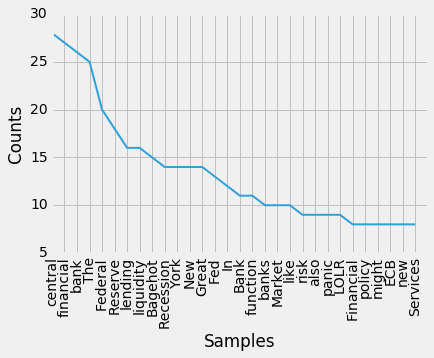

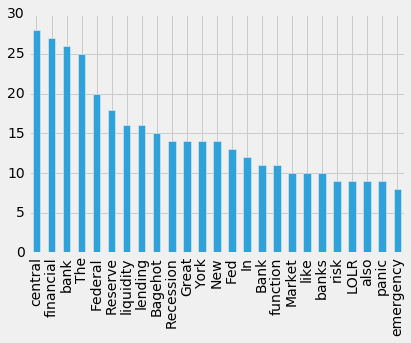

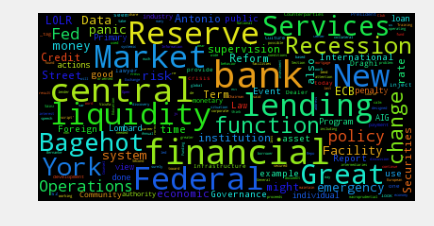

In [36]:
freqlist_visual(filtered_text,rawtext)

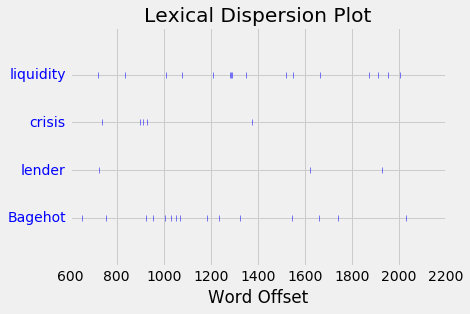

In [37]:
word_list = ['liquidity','crisis','lender','Bagehot']
#create dispersion plot to show frequency words show up as we scroll through the speech 
text_object.dispersion_plot(word_list)